# Results of TSD, DANN, SCADANN models across 10 days of inward rotation starting at Day_0~8 for Subject_4

Library used can be downloaded from https://github.com/aonai/long_term_EMG_myo   
&emsp; Original by UlysseCoteAllard https://github.com/UlysseCoteAllard/LongTermEMG   
Dataset recorded by https://github.com/Suguru55/Wearable_Sensor_Long-term_sEMG_Dataset   
Extended robot project can be found in https://github.com/aonai/myo_robot_arm

### Notes
* weights for TSD are total of 50 training models, 10 for each day
* weights for DANN and SCADANN are total of 45 trianing models, 9 for each day


* training examples should have shape (1, 2,)
* first session has shape (36, 572, 252)
* the following sessions have shape (4, 572, 252)
* training labels should have shape (1, 2,)


* location 0, 1, and 2 corresponds to neutral position, inward rotation, and outward rotation respectively
* session mentioned below are days, so number of sessions is 10



In [1]:
import os, sys
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import torch
import pandas as pd 

In [2]:
code_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo"
os.chdir(code_dir)
from PrepareAndLoadData.process_data import read_data_training

# 0. Prepare Data
use `switch=2` to train across days and individually on wearing location 0 (`session_in_include=[0]`)

### specify the directories used for running the code:
* `code_diar`: path to long_term_EMG_myo library
* `data_dir`: where raw dataset is loaded; raw data is in csv format
* `processed_data_dir`: where processed dataset is loaded; processed data is in npy pickle format
    * processed data should be a ndarray of shape   
    (controlling_factor_1 x controlling_factor_2 x num_sessions_per_gesture x #examples_window*#mov(26*22=572) x processed_channel_shape(252 for TSD, (4,8,10) for ConvNet)
* `path_<model_name>`: where model weights are saved
    * weights should be saved in folder `/Weights/<model_name>`. Each folder has subfolders containing weights for the first controlling factor.
    * weights for base model (TSD or ConvNet) contain m set of training model
    * weights for DANN and SCADANN contain m-1 set of trianing model (these models are trianed based on TSD, so they do not have a best_state_0.pt model). 
* `save_<model_name>`: where model results are saved
    * each result for testing a model on a group of dataset is saved in folder `results`. Each result has corresponding 
        * `<model_name>.txt` includes predictions, ground truths, array of accuracies for each participant and each session, and overall accuracy
        * `predictions_<model_name>.npy` includes array of accuracies, ground truths, predictions, and model outputs (probability array for each prediction)
        * remember to make blank files in these names before saving



* use `read_data_training` to process raw dataset
        

In [3]:
data_dir = "/home/laiy/gitrepos/msr_final/Wearable_Sensor_Long-term_sEMG_Dataset/data"
processed_data_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Processed_datasets_all_across_day_loc_1_lump9"
code_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo"
save_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Results"

path_TSD ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump9/TSD"
save_TSD = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

path_DANN ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump9/DANN"
save_DANN = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

path_SCADANN ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump9/SCADANN"
save_SCADANN = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

In [4]:
read_data_training(path=data_dir, store_path = processed_data_dir,  
                   sessions_to_include =[1], switch=2, include_in_first=9,
                   start_at_participant=5, num_participant=1)

Loading and preparing Training datasets...
session  1  --- process data in days  [2, 5, 6, 16, 17, 18, 22, 24, 25, 28]
index_participant_list  [5]
READ  Sub 5 _Loc 1 _Day 2
examples_per_session =  (1, 4, 572, 252)
READ  Sub 5 _Loc 1 _Day 5
Include day  5  in first dataset  (4, 572, 252)
examples of first session =  (8, 572, 252)
examples_per_session =  (1, 8, 572, 252)
READ  Sub 5 _Loc 1 _Day 6
Include day  6  in first dataset  (8, 572, 252)
examples of first session =  (12, 572, 252)
examples_per_session =  (1, 12, 572, 252)
READ  Sub 5 _Loc 1 _Day 16
Include day  16  in first dataset  (12, 572, 252)
examples of first session =  (16, 572, 252)
examples_per_session =  (1, 16, 572, 252)
READ  Sub 5 _Loc 1 _Day 17
Include day  17  in first dataset  (16, 572, 252)
examples of first session =  (20, 572, 252)
examples_per_session =  (1, 20, 572, 252)
READ  Sub 5 _Loc 1 _Day 18
Include day  18  in first dataset  (20, 572, 252)
examples of first session =  (24, 572, 252)
examples_per_session 

/home/laiy/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


examples_per_session =  (2,)
@ traning sessions =  (1, 2)
traning examples  (1, 2)
traning labels  (1, 2)
all traning examples  (1, 2)
all traning labels  (1, 2)


In [5]:
# check stored pickle 
with open(processed_data_dir + "/training_session.pickle", 'rb') as f:
    dataset_training = pickle.load(file=f)

examples_datasets_train = dataset_training['examples_training']
print('traning examples ', np.shape(examples_datasets_train))
labels_datasets_train = dataset_training['labels_training']
print('traning labels ', np.shape(labels_datasets_train))

traning examples  (1, 2)
traning labels  (1, 2)


In [6]:
for idx, examples_per_session in enumerate (examples_datasets_train[0]):
    print(idx, " examples_per_session = ", np.shape(examples_per_session))
    print(idx, " labels_per_session = ", np.shape(labels_datasets_train[0][idx]))

0  examples_per_session =  (36, 572, 252)
0  labels_per_session =  (36, 572)
1  examples_per_session =  (4, 572, 252)
1  labels_per_session =  (4, 572)


### Specify params used for training and testing

During training and testing, processed datasets are first put into pytorch dataloders, then feed to the model trainer; following are params for TSD model and dataloaders

* `num_kernels`: list of integers defining number of neurons used in each linear layer (linear block has `dropout`=0.5)
* `number_of_cycles_total`: number of trails performed for each session (assuming that all session have the same trail size)
    * 4 for myo across day training
* `number_of_classes`: total number of gestures performed in dataset
    * 22 for myo
* `batch_size`: number of examples stored in each batch
* `feature_vector_input_length`: length of input array or each processed signal; i.e. size of one training example 
    * 252 for TSD
* `learning_rate`= 0.002515
    

In [7]:
num_kernels=[200, 200, 200]                                
number_of_cycle_for_first_training = np.shape(examples_datasets_train[0][0])[0]               
number_of_cycles_total=np.shape(examples_datasets_train[-1][-1])[0]               
print("number_of_cycle_for_first_training ", number_of_cycle_for_first_training)
print("number_of_cycles_total ", number_of_cycles_total)
number_of_classes=22
batch_size=128          
feature_vector_input_length=252                     
learning_rate=0.002515

number_of_cycle_for_first_training  36
number_of_cycles_total  4


# 1. TSD_DNN
* `train_fine_tuning`: used to train data using a base model (TSD or ConvNet)
    * running this function will save num_sessions sets of TSD model weights (each is fine tuned based on the previous training)  
    
* `test_standard_model_on_training_sessions`: test model result


### check if dataloaders are loaded correctly:
* each participant has shape (num_session x 40 x 572 x 252)
* each session has shape (40 x 572 x 252)
* put these data into on group ends up with shape (40*572=22880, 252)
    * shuffle on group of data and put into dataloaders
    * each participant should have num_sessions sets of dataloaders, each correspond to one session
   

In [8]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_standard import \
            test_standard_model_on_training_sessions, train_fine_tuning

In [9]:
train_fine_tuning(examples_datasets_train, labels_datasets_train,
                  num_kernels=num_kernels, path_weight_to_save_to=path_TSD,
                  number_of_classes=number_of_classes, 
                  number_of_cycles_total=number_of_cycles_total,
                  number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                  batch_size=batch_size,
                  feature_vector_input_length=feature_vector_input_length,
                  learning_rate=learning_rate)

GET one participant_examples  (2,)
   GET one training_index_examples  (36, 572, 252)  at  0
   GOT one group XY  (20592, 252)    (20592,)
       one group XY test  (0,)    (0,)
       one group XY train (18532, 252)    (18532,)
       one group XY valid (2060, 252)    (2060, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
dataloaders: 
   train  (1, 2)
   valid  (1, 2)
   test  (1, 0)
START TRAINING
Participant:  0
Session:  0
<generator object Module.parameters at 0x7efd220e25f0>
Epoch 0/499
----------
train Loss: 0.00802420 Acc: 0.67643229
val Loss: 0.00021155 Acc: 0.84757282
New best validation loss: 0.00021154751766075207
Epoch 1 of 500 took 0.947s
Epoch 1/499
----------
train Loss: 0.00473713 Acc: 0.79052734
val Loss: 0.00018928 Acc: 0.85582524
Epoch 2 of 500 took 0.936s
Epoch 2/499
---

In [10]:
algo_name = "standard_TSD"
test_standard_model_on_training_sessions(examples_datasets_train, labels_datasets_train,
                                  num_neurons=num_kernels, use_only_first_training=True,
                                  path_weights=path_TSD,
                                  feature_vector_input_length=feature_vector_input_length,
                                  save_path = save_TSD, algo_name=algo_name,
                                  number_of_cycles_total=number_of_cycles_total,
                                  number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                                  number_of_classes=number_of_classes, cycle_for_test=3)

GET one participant_examples  (2,)
   GET one training_index_examples  (36, 572, 252)  at  0
   GOT one group XY  (20592, 252)    (20592,)
       one group XY test  (5148, 252)    (5148, 252)
       one group XY train (18532, 252)    (18532,)
       one group XY valid (2060, 252)    (2060, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
dataloaders: 
   train  (1, 2)
   valid  (1, 2)
   test  (1, 2)
0  SESSION   data =  5148
Participant:  0  Accuracy:  0.9054001554001554
1  SESSION   data =  572
Participant:  0  Accuracy:  0.8548951048951049
ACCURACY PARTICIPANT  0 :  [0.9054001554001554, 0.8548951048951049]
[array([0.90540016, 0.8548951 ])]
OVERALL ACCURACY: 0.8801476301476301


In [11]:
results_filename = save_TSD + '/predictions_' + algo_name + "_no_retraining.npy"
results = np.load(results_filename, allow_pickle=True)
TSD_acc = results[0]
TSD_acc_overall = np.mean(TSD_acc)
index_participant_list = ['0~8', 9]
TSD_df = pd.DataFrame(TSD_acc.transpose(), 
                       index = [f'Day_{i}' for i in index_participant_list],
                        columns = ['Participant_5'])
TSD_df

,Participant_5
Day_0~8,0.9054
Day_9,0.854895


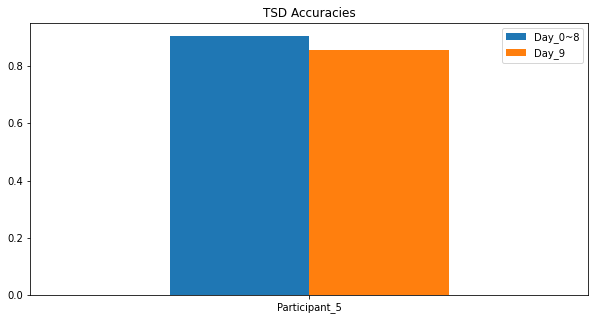

In [12]:
TSD_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("TSD Accuracies")
plt.show()

In [13]:
from TrainingsAndEvaluations.ForTrainingSessions.utils import get_gesture_accuracies

In [14]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
m_name = "Loc1_Sub"
n_name = "Day0~8->"
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name,
                           index_participant_list_customized=index_participant_list,
                           lump_day_at_participant=5)
df = pd.read_csv(save_TSD+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 2)
predictions =  (1, 2)
index_participant_list  ['0~8', 9]
accuracies_gestures =  (22, 2)


,Unnamed: 0,Loc1_Sub5_Day0~8->0~8,Loc1_Sub5_Day0~8->9
0,M0,1.000000,1.000000
1,M1,0.897436,0.961538
2,M2,0.935897,0.923077
3,M3,0.952991,0.538462
4,M4,0.867521,0.192308
5,M5,0.961538,0.961538
6,M6,0.961538,1.000000
7,M7,0.982906,1.000000
8,M8,0.918803,0.923077
9,M9,0.867521,0.923077


# 2. DANN
* `train_DANN`: train DANN model using the first set of training weights from base model
    * num_sessions-1 sets of training weights will be saved
* `test_DANN_on_training_sessions`: test DANN model

In [15]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_DA import train_DANN, test_DANN_on_training_sessions

In [16]:
train_DANN(examples_datasets_train, labels_datasets_train, 
          num_kernels=num_kernels,
          path_weights_fine_tuning=path_TSD,
          number_of_classes=number_of_classes,
          number_of_cycles_total = number_of_cycles_total,
          number_of_cycle_for_first_training = number_of_cycle_for_first_training,
          batch_size=batch_size,
          feature_vector_input_length=feature_vector_input_length,
          path_weights_to_save_to=path_DANN, learning_rate=learning_rate)

GET one participant_examples  (2,)
   GET one training_index_examples  (36, 572, 252)  at  0
   GOT one group XY  (20592, 252)    (20592,)
       one group XY test  (0,)    (0,)
       one group XY train (18532, 252)    (18532,)
       one group XY valid (2060, 252)    (2060, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
dataloaders: 
   train  (1, 2)
   valid  (1, 2)
   test  (1, 0)
SHAPE SESSIONS:  (2,)
()
=> loading checkpoint '/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump9/TSD/participant_0/best_state_0.pt'
Loading Optimizer
=> loaded checkpoint '/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump9/TSD/participant_0/best_state_0.pt' (epoch 10)
STA

Accuracy source 0.890625, main loss classifier 0.221667, source classification loss 0.308507, loss domain distinction 0.184284, accuracy domain distinction 0.500000
VALIDATION Loss: 0.19585155 Acc: 0.93349515
Epoch 30 of 500 took 0.243s
Accuracy source 0.887695, main loss classifier 0.230619, source classification loss 0.325897, loss domain distinction 0.183122, accuracy domain distinction 0.500000
VALIDATION Loss: 0.19707111 Acc: 0.93398058
Epoch 31 of 500 took 0.239s
Accuracy source 0.895020, main loss classifier 0.219503, source classification loss 0.303306, loss domain distinction 0.184149, accuracy domain distinction 0.500000
VALIDATION Loss: 0.20394354 Acc: 0.92912621
Epoch 32 of 500 took 0.245s
Accuracy source 0.873535, main loss classifier 0.240908, source classification loss 0.345963, loss domain distinction 0.183895, accuracy domain distinction 0.500000
VALIDATION Loss: 0.20858526 Acc: 0.92669903
Epoch 33 of 500 took 0.240s
Accuracy source 0.888184, main loss classifier 0.225

In [17]:
algo_name = "DANN"
test_DANN_on_training_sessions(examples_datasets_train, labels_datasets_train,
                              feature_vector_input_length=feature_vector_input_length,
                              num_neurons=num_kernels, path_weights_DA=path_DANN,
                              algo_name=algo_name, save_path = save_DANN, 
                              number_of_cycles_total=number_of_cycles_total,
                              number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                              path_weights_normal=path_TSD, number_of_classes=number_of_classes,
                              cycle_for_test=3)

GET one participant_examples  (2,)
   GET one training_index_examples  (36, 572, 252)  at  0
   GOT one group XY  (20592, 252)    (20592,)
       one group XY test  (5148, 252)    (5148, 252)
       one group XY train (18532, 252)    (18532,)
       one group XY valid (2060, 252)    (2060, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
dataloaders: 
   train  (1, 2)
   valid  (1, 2)
   test  (1, 2)
(2,)
Participant ID:  0  Session ID:  0  Accuracy:  0.9054001554001554
Participant ID:  0  Session ID:  1  Accuracy:  0.8513986013986014
ACCURACY PARTICIPANT:  [0.9054001554001554, 0.8513986013986014]
[[0.90540016 0.8513986 ]]
[array([0.90540016, 0.8513986 ])]
OVERALL ACCURACY: 0.8783993783993784


In [18]:
results_filename = save_DANN + '/predictions_' + algo_name + ".npy"
results = np.load(results_filename, allow_pickle=True)
DANN_acc = results[0]
DANN_acc_overall = np.mean(DANN_acc)
DANN_df = pd.DataFrame(DANN_acc.transpose(), 
                       index = [f'Day_{i}' for i in index_participant_list],
                        columns = ['Participant_5'])
DANN_df

,Participant_5
Day_0~8,0.9054
Day_9,0.851399


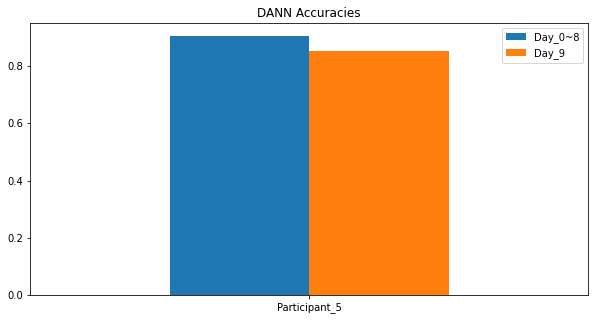

In [19]:
DANN_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("DANN Accuracies")
plt.show()

In [20]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name,
                           index_participant_list_customized=index_participant_list,
                           lump_day_at_participant=5)
df = pd.read_csv(save_DANN+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 2)
predictions =  (1, 2)
index_participant_list  ['0~8', 9]
accuracies_gestures =  (22, 2)


,Unnamed: 0,Loc1_Sub5_Day0~8->0~8,Loc1_Sub5_Day0~8->9
0,M0,1.000000,1.000000
1,M1,0.897436,0.884615
2,M2,0.935897,0.961538
3,M3,0.952991,0.461538
4,M4,0.867521,0.576923
5,M5,0.961538,0.961538
6,M6,0.961538,1.000000
7,M7,0.982906,1.000000
8,M8,0.918803,0.923077
9,M9,0.867521,0.807692


# 3. SCADANN

* `run_SCADANN_training_sessions`: train SCADANN model. The first session uses TSD model_0 wegits; others use DANN weights
    * specify `percentage_same_gesture_stable` based on the performance of most pseudo labels: 
        * print accuracies out and check what percentage will optimize `ACCURACY MODEL` and `ACCURACY PSEUDO` without cutting out too much data 
    * num_sessions-1 sets of training weights will be saved


In [21]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_SCADANN import \
    run_SCADANN_training_sessions, test_network_SCADANN

In [22]:
percentage_same_gesture_stable = 0.75 
run_SCADANN_training_sessions(examples_datasets=examples_datasets_train, labels_datasets=labels_datasets_train,
                              num_kernels=num_kernels, feature_vector_input_length=feature_vector_input_length,
                              path_weights_to_save_to=path_SCADANN,
                              path_weights_Adversarial_training=path_DANN,
                              path_weights_Normal_training=path_TSD,
                              number_of_cycles_total = number_of_cycles_total, 
                              number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                              number_of_classes=number_of_classes,
                              learning_rate=learning_rate)

GET one participant_examples  (2,)
   GET one training_index_examples  (36, 572, 252)  at  0
   GOT one group XY  (20592, 252)    (20592,)
       one group XY test  (0,)    (0,)
       one group XY train (20592, 252)    (20592,)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
dataloaders: 
   train  (1, 2)
   valid  (0,)
   test  (1, 0)
participants_train =  1
Optimizer =  <generator object Module.parameters at 0x7efd22158b30>
=> loading checkpoint '/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump9/DANN/participant_0/best_state_1.pt'
Loading Optimizer
=> loaded checkpoint '/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump9/DANN/participant_0/best_state_1.pt' (epoch 47)
=> loading checkpoint '/home/laiy/gitrep

/home/laiy/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/laiy/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Accuracy total 0.863281, main loss classifier 0.488760, source accuracy 0.881611 source classification loss 0.330979, target accuracy 0.844952 target loss 0.418861 accuracy domain distinction 0.500000 loss domain distinction 1.138399,
VALIDATION Loss: 0.27781433 Acc: 0.91962175
New best validation loss:  0.2778143286705017
Epoch 2 of 500 took 0.399s
Accuracy total 0.870192, main loss classifier 0.477677, source accuracy 0.880409 source classification loss 0.338472, target accuracy 0.859976 target loss 0.404925 accuracy domain distinction 0.500000 loss domain distinction 1.059784,
VALIDATION Loss: 0.25161982 Acc: 0.89834515
New best validation loss:  0.2516198179551533
Epoch 3 of 500 took 0.402s
Accuracy total 0.871995, main loss classifier 0.462476, source accuracy 0.871995 source classification loss 0.335463, target accuracy 0.871995 target loss 0.381775 accuracy domain distinction 0.500000 loss domain distinction 1.038567,
VALIDATION Loss: 0.24462104 Acc: 0.90780142
New best validati

In [23]:
algo_name = "SCADANN"
test_network_SCADANN(examples_datasets_train=examples_datasets_train, labels_datasets_train=labels_datasets_train,
                     num_neurons=num_kernels, feature_vector_input_length=feature_vector_input_length,
                     path_weights_SCADANN =path_SCADANN, path_weights_normal=path_TSD,
                     algo_name=algo_name, cycle_test=3, number_of_cycles_total=number_of_cycles_total,
                     number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                     number_of_classes=number_of_classes, save_path = save_SCADANN)

GET one participant_examples  (2,)
   GET one training_index_examples  (36, 572, 252)  at  0
   GOT one group XY  (20592, 252)    (20592,)
       one group XY test  (5148, 252)    (5148, 252)
       one group XY train (18532, 252)    (18532,)
       one group XY valid (2060, 252)    (2060, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
dataloaders: 
   train  (1, 2)
   valid  (1, 2)
   test  (1, 2)
Participant:  0  Accuracy:  0.9054001554001554
Participant:  0  Accuracy:  0.8916083916083916
ACCURACY PARTICIPANT:  [0.9054001554001554, 0.8916083916083916]
[[0.90540016 0.89160839]]
[array([0.90540016, 0.89160839])]
OVERALL ACCURACY: 0.8985042735042734


In [24]:
results_filename = save_SCADANN + '/predictions_' + algo_name + ".npy"
results = np.load(results_filename, allow_pickle=True)
SCADANN_acc = results[0]
SCADANN_acc_overall = np.mean(SCADANN_acc)
SCADANN_df = pd.DataFrame(SCADANN_acc.transpose(), 
                       index = [f'Day_{i}' for i in index_participant_list],
                        columns = ['Participant_5'])
SCADANN_df

,Participant_5
Day_0~8,0.9054
Day_9,0.891608


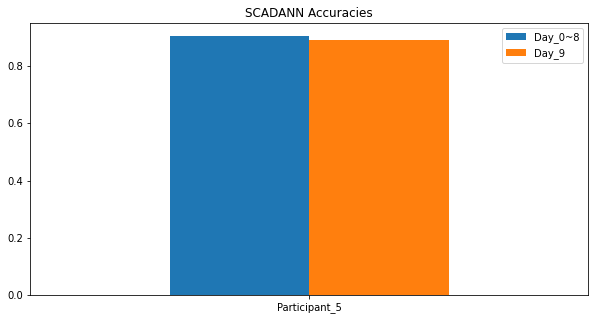

In [25]:
SCADANN_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("SCADANN Accuracies")
plt.show()

In [26]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name,
                           index_participant_list_customized=index_participant_list,
                           lump_day_at_participant=5)
df = pd.read_csv(save_SCADANN+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 2)
predictions =  (1, 2)
index_participant_list  ['0~8', 9]
accuracies_gestures =  (22, 2)


,Unnamed: 0,Loc1_Sub5_Day0~8->0~8,Loc1_Sub5_Day0~8->9
0,M0,1.000000,1.000000
1,M1,0.897436,1.000000
2,M2,0.935897,1.000000
3,M3,0.952991,0.500000
4,M4,0.867521,0.653846
5,M5,0.961538,1.000000
6,M6,0.961538,1.000000
7,M7,0.982906,1.000000
8,M8,0.918803,0.923077
9,M9,0.867521,0.807692


# Conclusion
Suppose there is a ndarray of NxM dataloaders, then N group of models will be trained, and each group will have M model. Each group is independent of the other, and each model within a group is dependent on its previous training weights.

In general, overall accuracies of SCADANN are better than DANN, and DANN is better than TSD.
Occasionally accuracies of SCADANN end up a little smaller than DANN, reasons may be lack of datasets put into training model (fixed) and non-optimal percentage_same_gesture_sable (fixed). Code should be reproducible if processed dataset sticks to the shape defined above.  

The amount of increase in accuracies from DANN to SCADANN looks random. But if the base model is better at classifying one session, then its corresponding SCADANN is also better at classifying the same session. Given such result, to obtain the best performance from SCADANN, a good model trained with good data should be the starting point.

* What to check if sth goes wrong:
    * percentage_same_gesture_sable
    * number of cycles or sessions
    * shape of dataloaders (combination of train, test, valid should include all dataset)
    * shape of procssed datasets
    * directory paths of weights and results
    * if weights are stored or loaded correcltyTSD_acc_overall_one = np.mean(TSD_acc, axis=0)

In [27]:
print("TSD")
display(TSD_df)
print("DANN")
display(DANN_df)
print("SCADANN")
display(SCADANN_df)

TSD


,Participant_5
Day_0~8,0.9054
Day_9,0.854895


DANN


,Participant_5
Day_0~8,0.9054
Day_9,0.851399


SCADANN


,Participant_5
Day_0~8,0.9054
Day_9,0.891608


In [28]:
diff_df = SCADANN_df-TSD_df
diff_df = diff_df.drop('Day_'+index_participant_list[0])
display(diff_df)
diff_df.to_csv(save_TSD+'/diff_results/across_day_loc1_lump9_diff.csv')

,Participant_5
Day_9,0.036713


In [29]:
overall_acc_df = pd.DataFrame([TSD_acc_overall, DANN_acc_overall, SCADANN_acc_overall],
                             index = ["TSD", "DANN", "SCADANN"],
                             columns = ["Overall_Acc"])
overall_acc_df

,Overall_Acc
TSD,0.880148
DANN,0.878399
SCADANN,0.898504


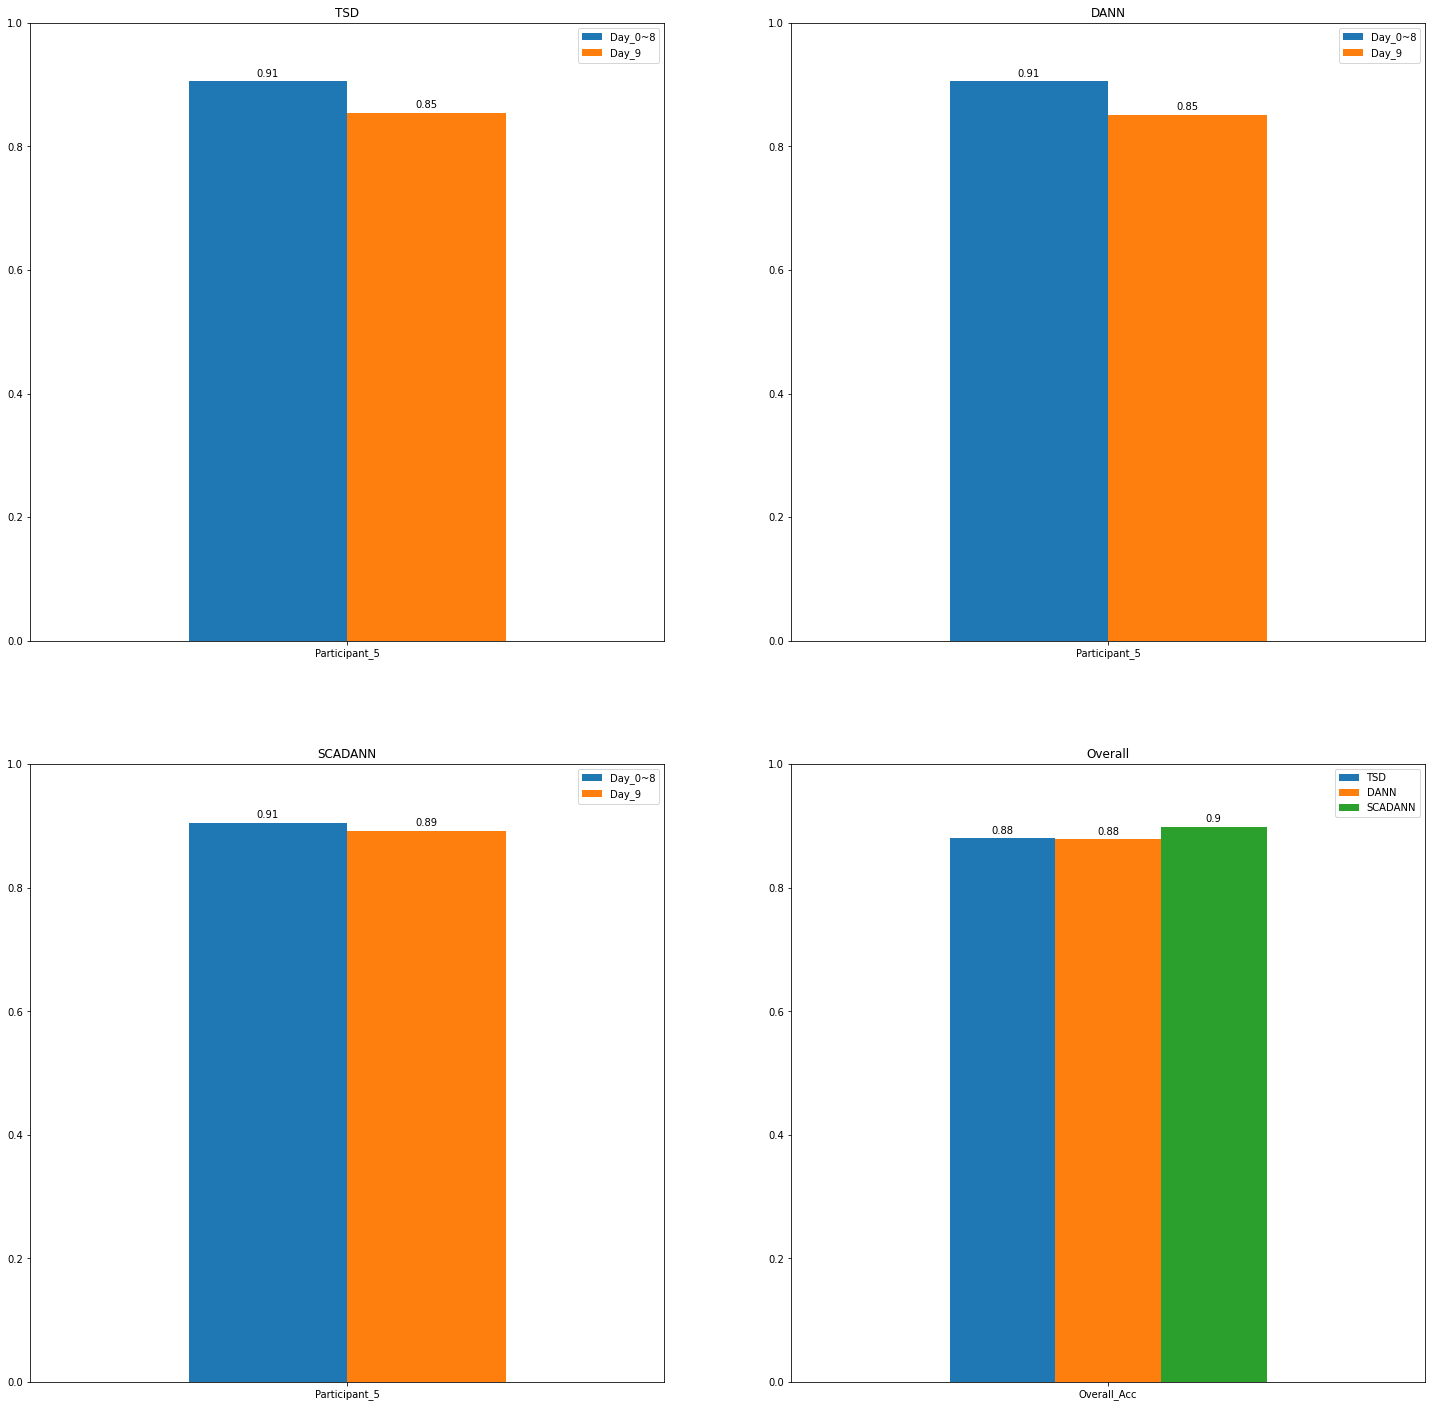

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,25))
acc_list = [TSD_df, DANN_df, SCADANN_df, overall_acc_df]
title_list = ["TSD", "DANN", "SCADANN", "Overall"]
for idx, ax in enumerate(axes.reshape(-1)): 
    acc_list[idx].transpose().plot.bar(ax = ax, rot=0)
    ax.set_title(title_list[idx])
    ax.set_ylim([0, 1.0])
    for p in ax.patches:
        ax.annotate(str(np.round(p.get_height(),2)), (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(0, 8),textcoords='offset points')
